# Introduction
Install dependecies and dataset

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

Dataset

In [7]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors


In [8]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [10]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)

(7043, 21)


# Data Cleansing

In [11]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Handle missing values in 'TotalCharges' (convert to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
# Fill NaN values in 'TotalCharges' with 0 (or median if preferred)
df.fillna({'TotalCharges' : 0}, inplace=True)

In [16]:
# Convert 'SeniorCitizen' to Yes/No for clarity
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Metrics

In [17]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.54%


In [18]:
retention_rate = df['Churn'].value_counts(normalize=True)['No'] * 100
print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 73.46%


<Figure size 800x500 with 0 Axes>

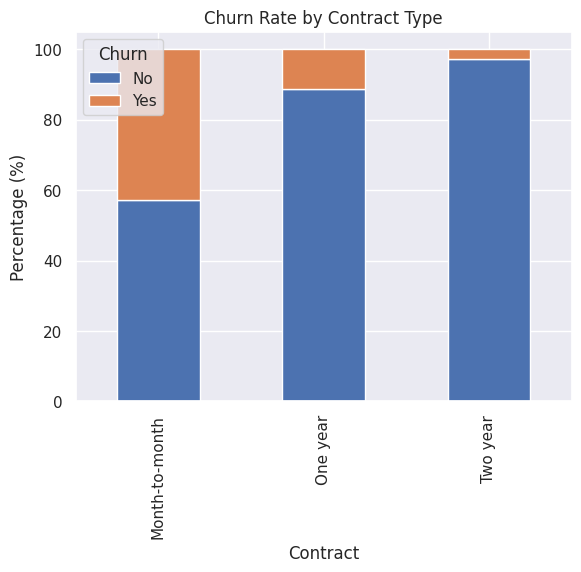

In [20]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Visualizing Churn by Contract Type
plt.figure(figsize=(8, 5))
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage (%)')
plt.show()

In [21]:
monthly_revenue_loss = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
print(f"Monthly Revenue Loss Due to Churn: ${monthly_revenue_loss:.2f}")

Monthly Revenue Loss Due to Churn: $139130.85


Customer Lifetime Value (LTV) Calculation
We'll approximate LTV by calculating:

LTV
=
Avg Monthly Charges
×
Avg Tenure
LTV=Avg Monthly Charges×Avg Tenure

In [22]:
avg_monthly_charges = df['MonthlyCharges'].mean()
avg_tenure = df['tenure'].mean()
LTV = avg_monthly_charges * avg_tenure
print(f"Estimated Customer Lifetime Value (LTV): ${LTV:.2f}")

Estimated Customer Lifetime Value (LTV): $2096.41


# Visualization

<ipython-input-23-1c443e8a398f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')


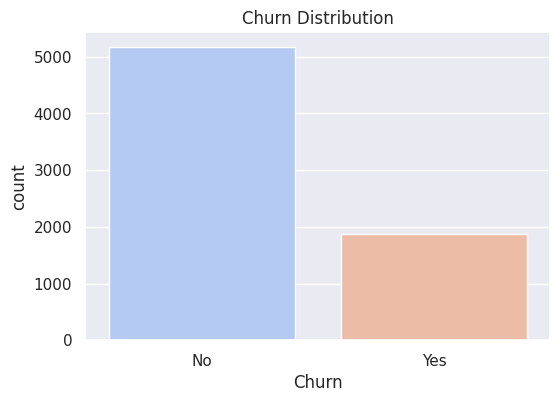

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

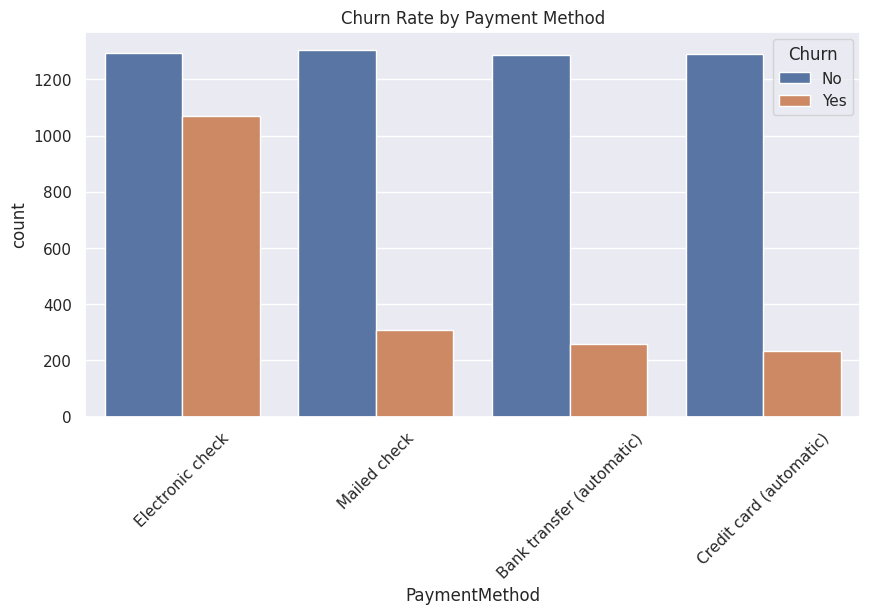

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()

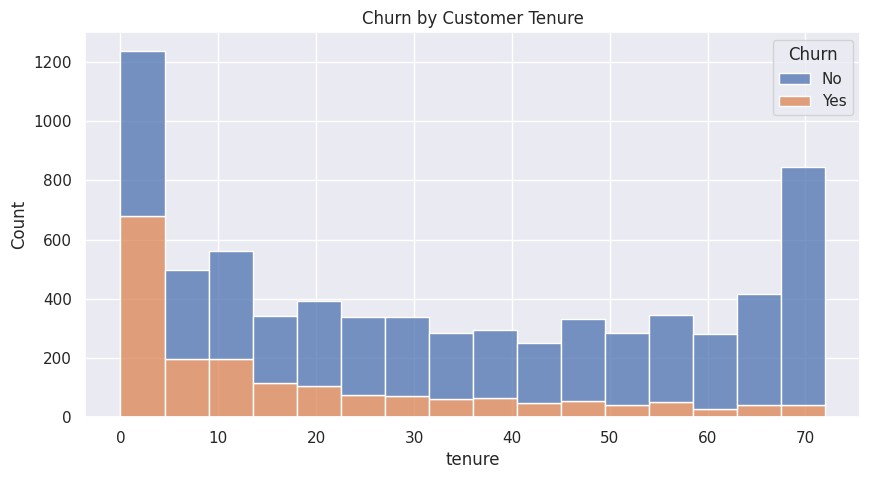

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Churn by Customer Tenure')
plt.show()

Based on the insights, you can develop practical strategies such as:

- Offering discounts or incentives for customers nearing the end of their
contract.
- Identifying and addressing key pain points in high-churn services.
- Promoting long-term contracts to improve retention.
- Targeting low-risk customer groups for upselling.
